# Explore here

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima


In [22]:
# Your code here

sales_ds = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
sales_ds.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [23]:
sales_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [24]:
sales_ds['date'] = pd.to_datetime(sales_ds['date'], format="%Y-%m-%d %H:%M:%S.%f").dt.date
sales_ds

,date,sales
0,2022-09-03,55.292157
1,2022-09-04,53.803211
2,2022-09-05,58.141693
3,2022-09-06,64.530899
4,2022-09-07,66.013633
...,...,...
361,2023-08-30,989.600354
362,2023-08-31,994.987326
363,2023-09-01,995.814415
364,2023-09-02,997.350214


In [25]:
sales_ds = sales_ds.set_index("date")
sales_ds.info()


<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2022-09-03 to 2023-09-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [26]:
ts_sales = sales_ds['sales']
ts_sales

date
2022-09-03      55.292157
2022-09-04      53.803211
2022-09-05      58.141693
2022-09-06      64.530899
2022-09-07      66.013633
                 ...     
2023-08-30     989.600354
2023-08-31     994.987326
2023-09-01     995.814415
2023-09-02     997.350214
2023-09-03    1000.482785
Name: sales, Length: 366, dtype: float64

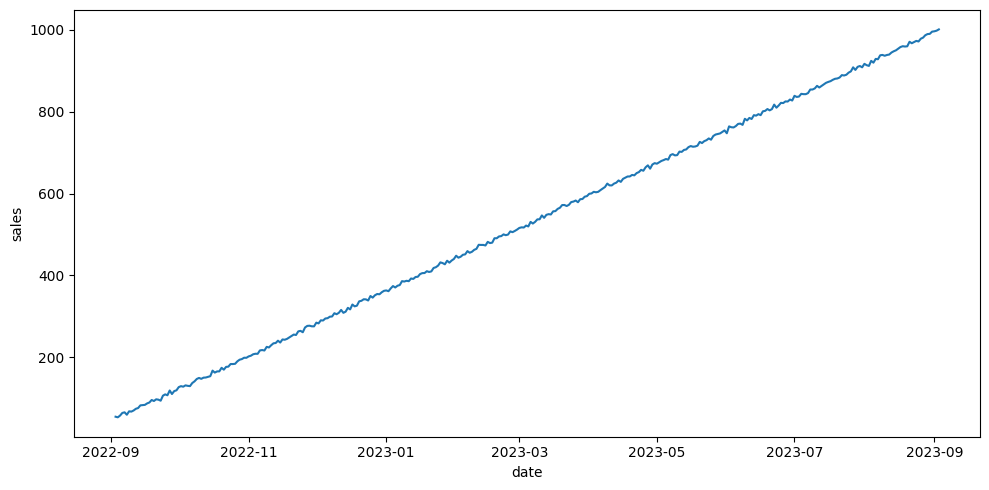

In [27]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_sales)

plt.tight_layout()

plt.show()

In [28]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_sales)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

As the test stationarity shows, the null hypothesis is accepted and rejected the alternative hypothesis

In [29]:
decomposition = seasonal_decompose(ts_sales, period = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

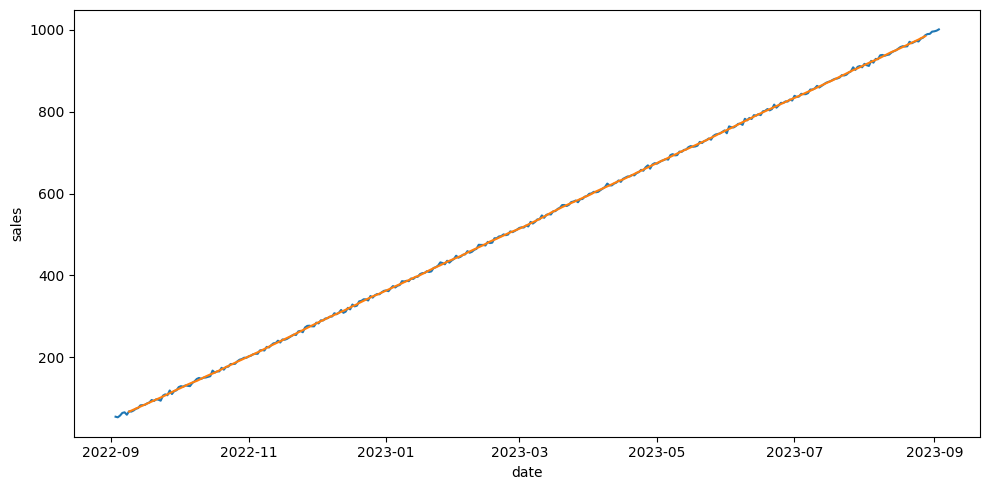

In [30]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_sales)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

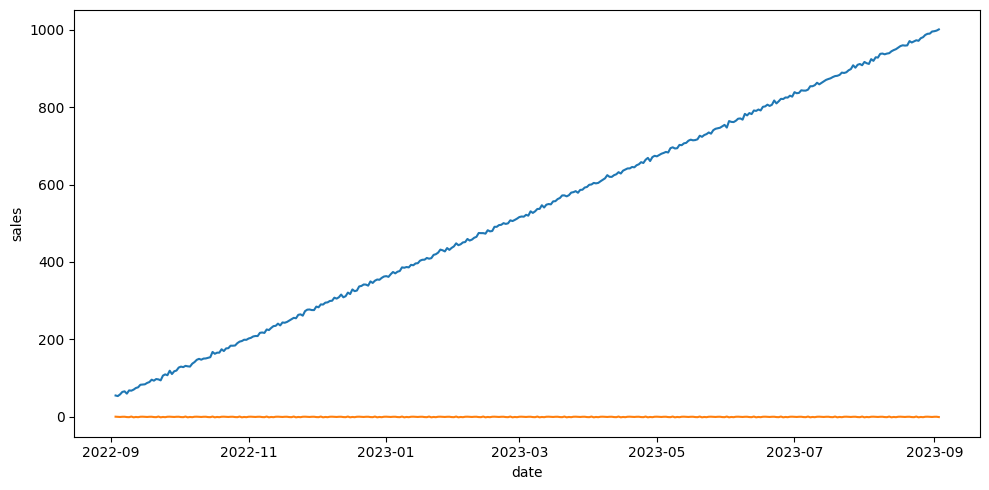

In [31]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_sales)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

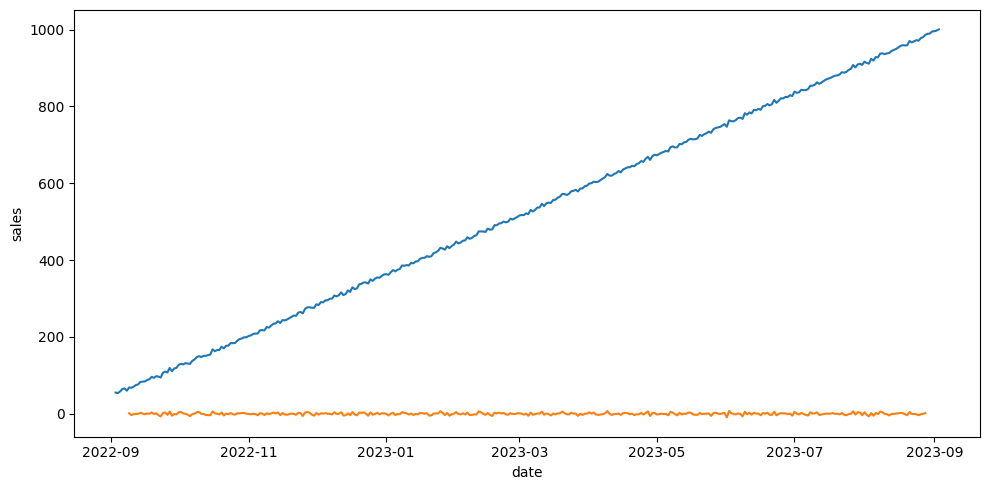

In [32]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_sales)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

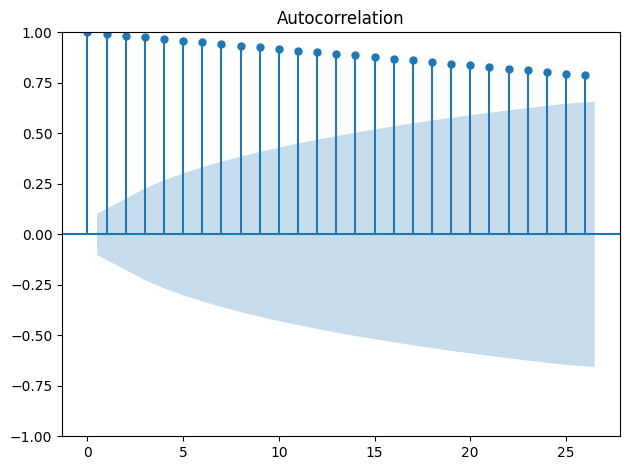

In [33]:
plot_acf(ts_sales)

plt.tight_layout()

plt.show()

In [40]:
model = auto_arima(ts_sales, seasonal = True, trace = True, m = 7)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=11.16 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1966.396, Time=0.41 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2209.657, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1970.972, Time=0.11 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=1968.120, Time=3.17 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=1968.220, Time=0.64 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=1966.919, Time=0.27 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=1965.376, Time=7.38 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=1965.211, Time=12.42 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=1963.937, Time=8.58 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=1967.822, Time=4.42 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=2094.918, Time=9.40 sec
 ARIMA(2,1,0)(1,0,2)[7] intercept   : AIC

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  366
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood                -910.886
Date:                                Mon, 18 Dec 2023   AIC                           1837.772
Time:                                        17:17:59   BIC                           1868.971
Sample:                                    09-03-2022   HQIC                          1850.171
                                         - 09-03-2023                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.1998      0.490     10.612      0.000       4.239       6.160
ar.L1         -0.0605      0.052     -1.159      0.246      -0.163       0.042
ar.L2          0.0348      0.057      0.610      0.542      -0.077       0.147
ma.L1         -0.9779      0.017    -57.442      0.000      -1.011      -0.945
ar.S.L7       -0.9499      0.094    -10.148      0.000      -1.133      -0.766
ma.S.L7        1.0985      0.107     10.223      0.000       0.888       1.309
ma.S.L14       0.1641      0.053      3.118      0.002       0.061       0.267
sigma2         8.4639      0.660     12.817      0.000       7.170       9.758
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.97   Prob(JB):                         0.87
Heteroskedasticity (H):               0.87   Skew:                             0.05
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
forecast = model.predict(10)
forecast

2023-09-04    1002.538065
2023-09-05    1005.499988
2023-09-06    1007.520009
2023-09-07    1010.680917
2023-09-08    1012.588786
2023-09-09    1015.522328
2023-09-10    1017.913566
2023-09-11    1020.247570
2023-09-12    1022.808000
2023-09-13    1025.536995
Freq: D, dtype: float64

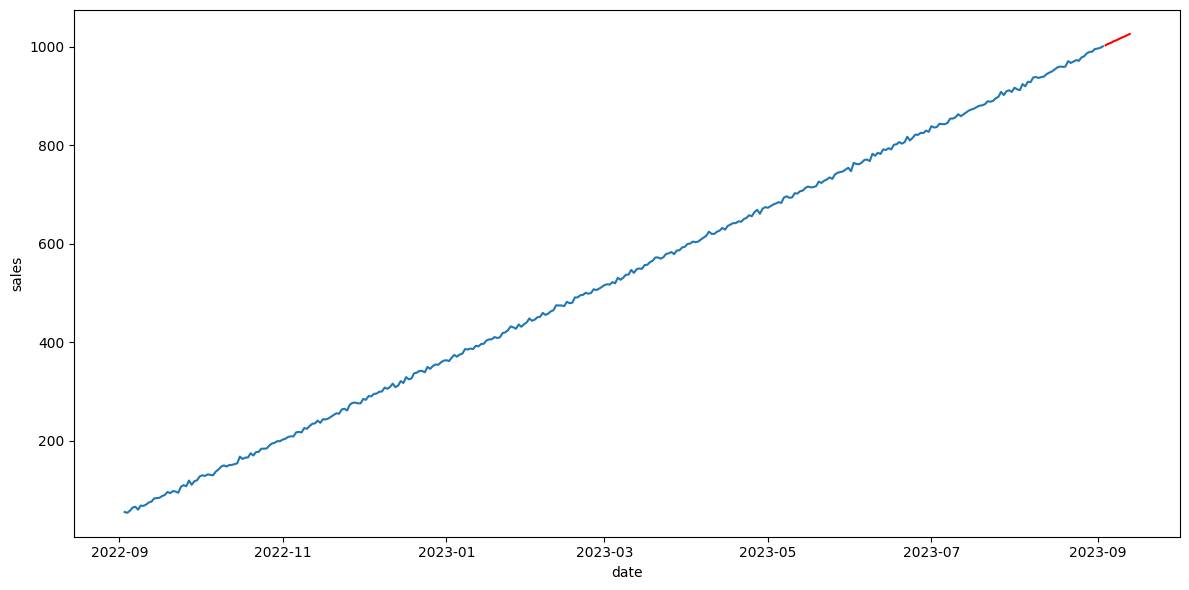

In [43]:
fig, axis = plt.subplots(figsize = (12, 6))

sns.lineplot(data = ts_sales)
sns.lineplot(data = forecast, c = "red")

plt.tight_layout()

plt.show()